In [16]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#easy and updated access to data through direct importing from website
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
url_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
states = pd.read_csv(url_states)
# counties = pd.read_csv(url_counties, index_col=0)
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [51]:
#get target states
washington = states.query('state == "Washington"').reset_index(drop=True)
california = states.query('state == "California"').reset_index(drop=True)
newyork = states.query('state == "New York"').reset_index(drop=True)
newyork.head()

,date,state,fips,cases,deaths
0,2020-03-01,New York,36,1,0
1,2020-03-02,New York,36,1,0
2,2020-03-03,New York,36,2,0
3,2020-03-04,New York,36,11,0
4,2020-03-05,New York,36,22,0


In [18]:
washington.insert(5, "actions", None)
california.insert(5, "actions", None)
newyork.insert(5, 'actions', None)

In [66]:
washington.at[39, "actions"] = 'declared state of emergency'
washington.at[43, "actions"] = '$100 million funding'
washington.at[44, "actions"] = 'waive test copays; health care workers compensation'
washington.at[49, "actions"] = 'ban on gatherings > 250; business recovery measures'
washington.at[51, "actions"] = 'schools closed for 6 weeks'
washington.at[52, "actions"] = 'in-person classes prohibited'
washington.at[54, "actions"] = 'close restaurants and recreational facilites'
washington.at[56, "actions"] = '$200 million funding'
washington.at[58, "actions"] = 'restrictions on non-urgent medical procedures'
washington.at[61, "actions"] = 'white house declares statewide major disaster'
washington.at[62, "actions"] = '2 week stay at home order'
washington.at[72, "actions"] = 'stay at home extended till may 4'
washington.at[76, "actions"] = 'schools closed for remainder of 2019-2020'

In [67]:
california.at[8, "actions"] = 'activated public health emergency operations'
california.at[38, "actions"] = 'declared state of emergency'
california.at[40, "actions"] = 'free testing'
california.at[42, "actions"] = 'issued guidelines for educational facilities'
california.at[46, "actions"] = 'ban on gatherings > 250'
california.at[48, "actions"] = 'unemployment insurance for sick/quarantined'
california.at[50, "actions"] = 'close bars'
california.at[52, "actions"] = '$1 billion funding'
california.at[54, "actions"] = 'stay home order'
california.at[55, "actions"] = 'deployed national guard'
california.at[57, "actions"] = 'white house declares statewide major disaster'

In [68]:
newyork.at[1, 'actions'] = 'free testing; expand testing capacity'
newyork.at[2, 'actions'] = '$40 million funding'
newyork.at[6, 'actions'] = 'declared state of emergency'
newyork.at[9, 'actions'] = 'deployed national guard'
newyork.at[11, 'actions'] = 'ban on gatherings > 500'
newyork.at[15, 'actions'] = 'schools closed for 2 weeks; increased hospital capacity'
newyork.at[16, 'actions'] = 'paid sick leave; compensation for quarantined'
newyork.at[17, 'actions'] = 'ban gatherings >50; close restaurants and recreational facilites'
newyork.at[31, 'actions'] = 'closed playgrounds'
newyork.at[32, 'actions'] = 'allow javits to accept sick'

In [69]:
import numpy

newyork_offsets = list(range(0, 40))
testing = pd.read_csv("testing/us_testing.csv")
california['tests'] = testing['california'].drop(index=[0,1,2,3]).reset_index(drop=True)
newyork['tests'] = testing['newyork'].drop(index=newyork_offsets).reset_index(drop=True)
washington['tests'] = testing['washington']
washington.tail()

,date,state,fips,cases,deaths,tests,actions
76,2020-04-06,Washington,53,8384,383,92166,schools closed for remainder of 2019-2020
77,2020-04-07,Washington,53,8682,409,92508,NaN
78,2020-04-08,Washington,53,9097,430,92999,NaN
79,2020-04-09,Washington,53,9608,456,92999,NaN
80,2020-04-10,Washington,53,9887,483,92999,NaN


In [70]:
for state in [washington, california, newyork]:
    state['date'] = pd.to_datetime(state['date'])

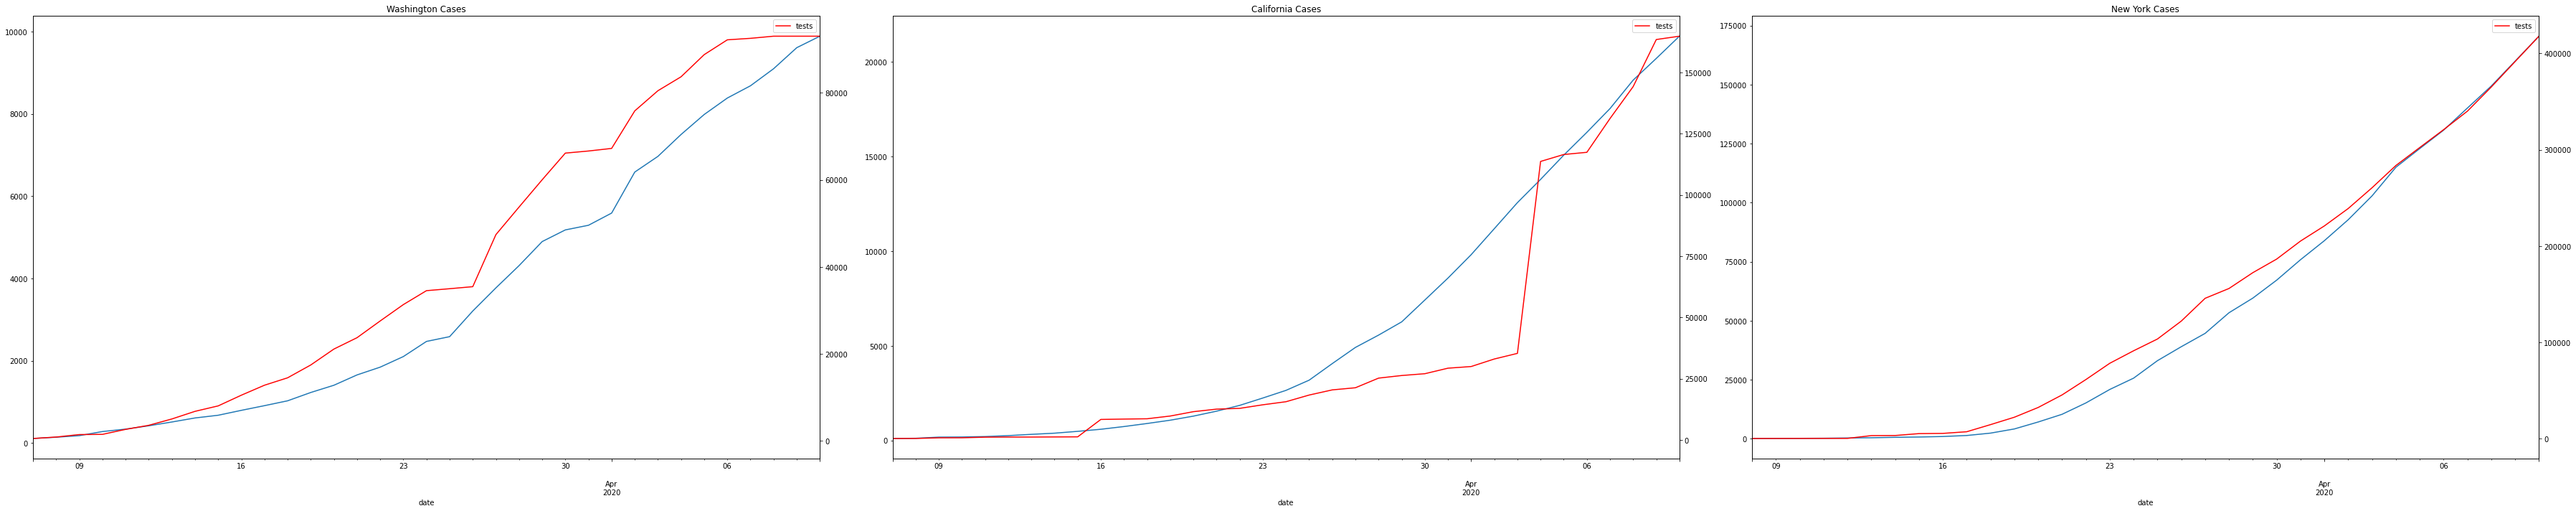

In [71]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(1,3, figsize=(50,10))
current = 0
#line graphs for cases and tests over time for each state (starting from the day that the state had >= 100 cases)
for df in [washington, california, newyork]:
    df = df.query('cases >= 100')
    df.plot(x="date", y="cases", legend=False, ax=ax[current], title=df.iloc[0,1] + " Cases")
    ax2 = ax[current].twinx()
    df.plot(x="date", y="tests", legend=True, ax=ax2, color="red")
    current += 1
plt.tight_layout();

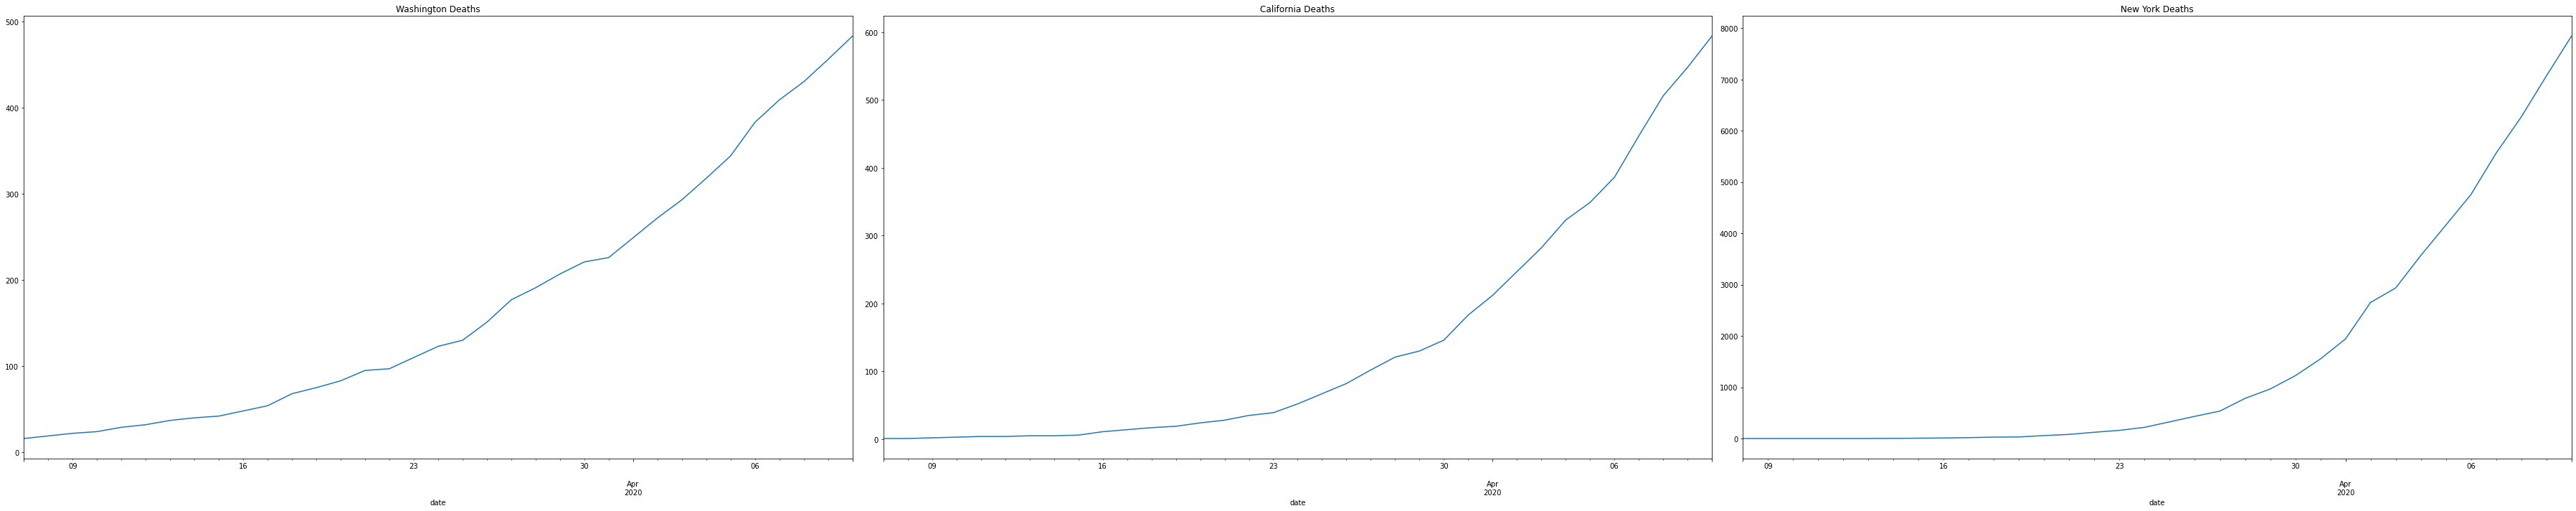

In [72]:
plt.figure(figsize=(50,10))


#line graphs for deaths over time for each state (starting from the day that the state had >= 100 cases)
current = 1
for df in [washington, california, newyork]:
    ax = plt.subplot(1,3, current)
    df = df.query('cases >= 100')
    df.plot(x="date", y="deaths", legend=False, ax=ax, title=df.iloc[0,1] + " Deaths")
    current += 1
plt.tight_layout();

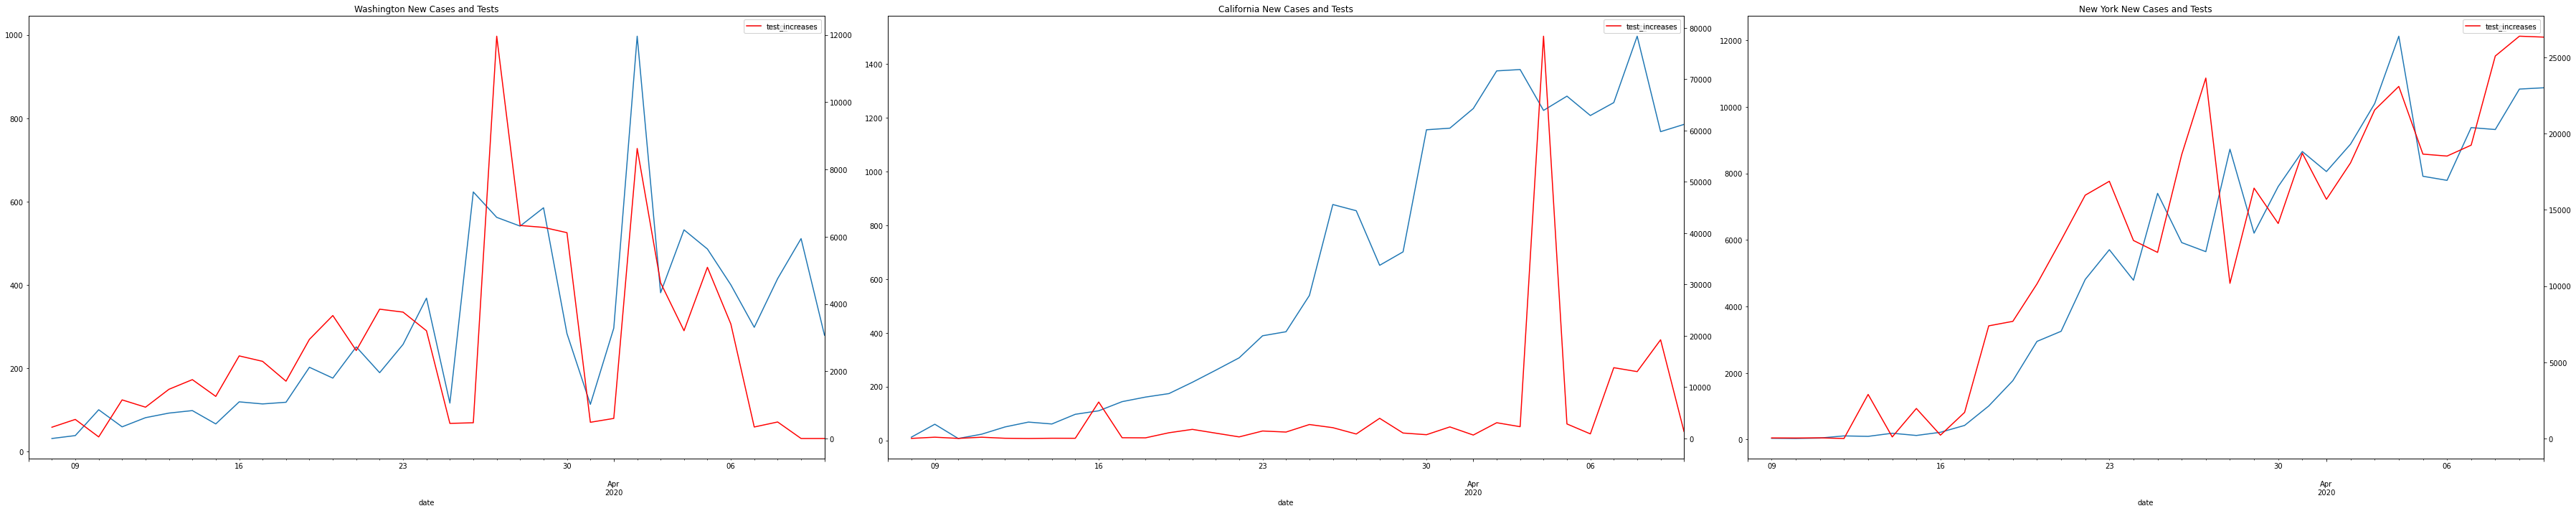

In [85]:
pd.options.mode.chained_assignment = None

#line graph representation of new cases and tests per day for each state
fig, ax = plt.subplots(1,3, figsize=(50,10))
current = 0
for df in [washington, california, newyork]:
    df = df.query('cases >= 100')
    df['case_increase'] = df.cases.diff().values
    df.plot(x="date", y="case_increase", legend=True, ax=ax[current], title=df.iloc[0,1] + " New Cases and Tests", kind='line')
    df['test_increases']=df.tests.diff().values
    ax2 = ax[current].twinx()
    df.plot(x='date', y="test_increases", legend=True, ax=ax2, kind="line", color='red')
    current += 1
plt.tight_layout();

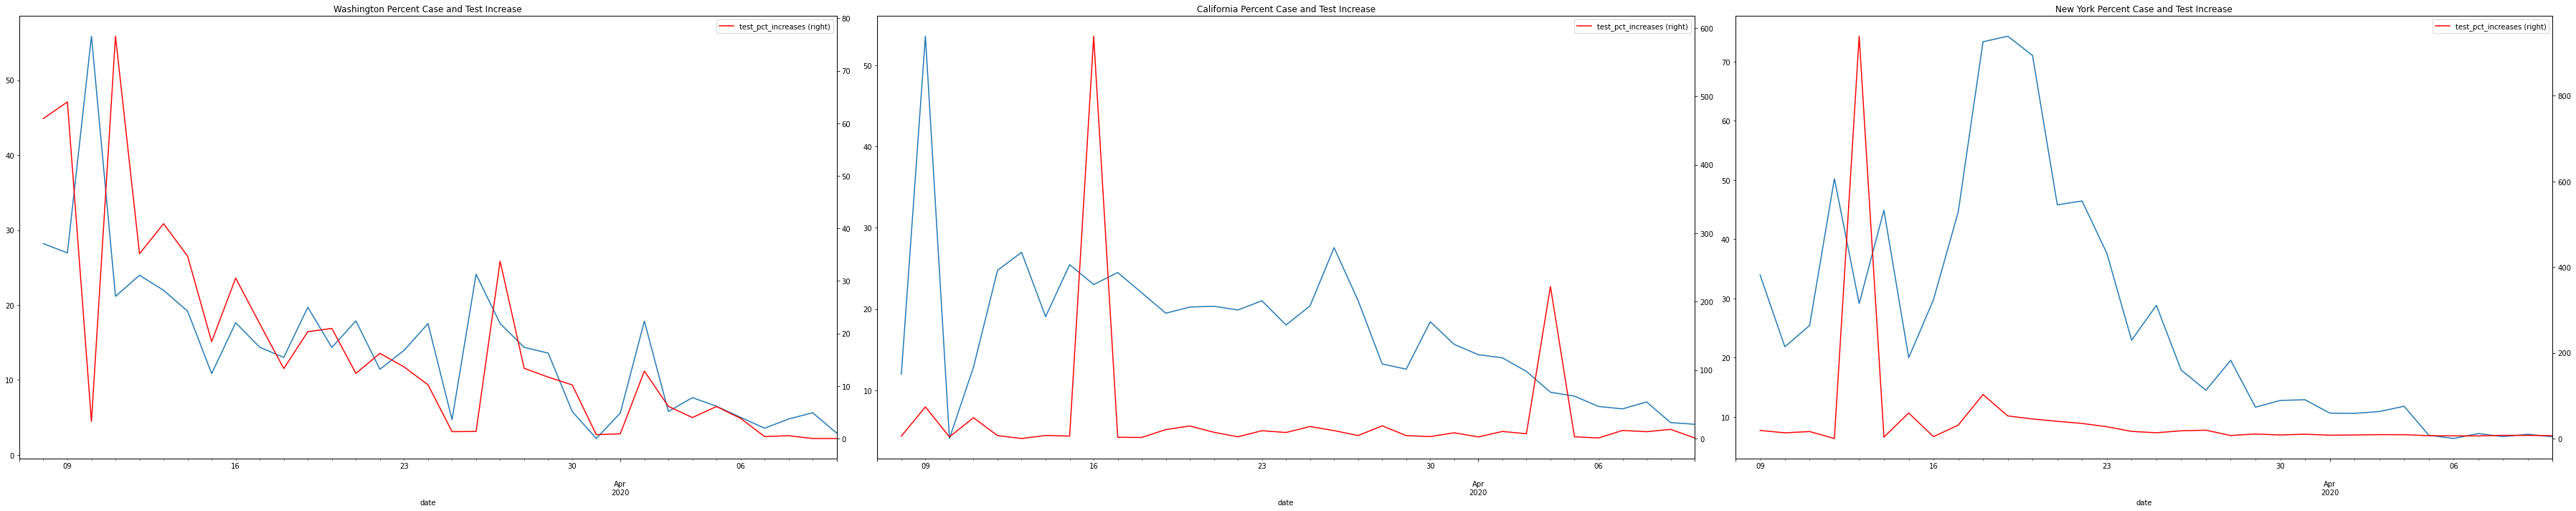

In [87]:
#line graph of percent change in cases per day for each state
fig, ax = plt.subplots(1,3, figsize=(50,10))
current = 0
for df in [washington, california, newyork]:
    df = df.query('cases >= 100')
    df['case_pct_increase'] = df.cases.pct_change().values * 100
    df.plot(x="date", y="case_pct_increase", legend=False, ax=ax[current], title=df.iloc[0,1] + " Percent Case and Test Increase", kind='line')
    df['test_pct_increases']=df.tests.pct_change().values * 100
    ax2 = ax[current].twinx()
    df.plot(x='date', y="test_pct_increases", legend=True, ax=ax2, kind="line", color='red', secondary_y=True)
    current += 1
plt.tight_layout();

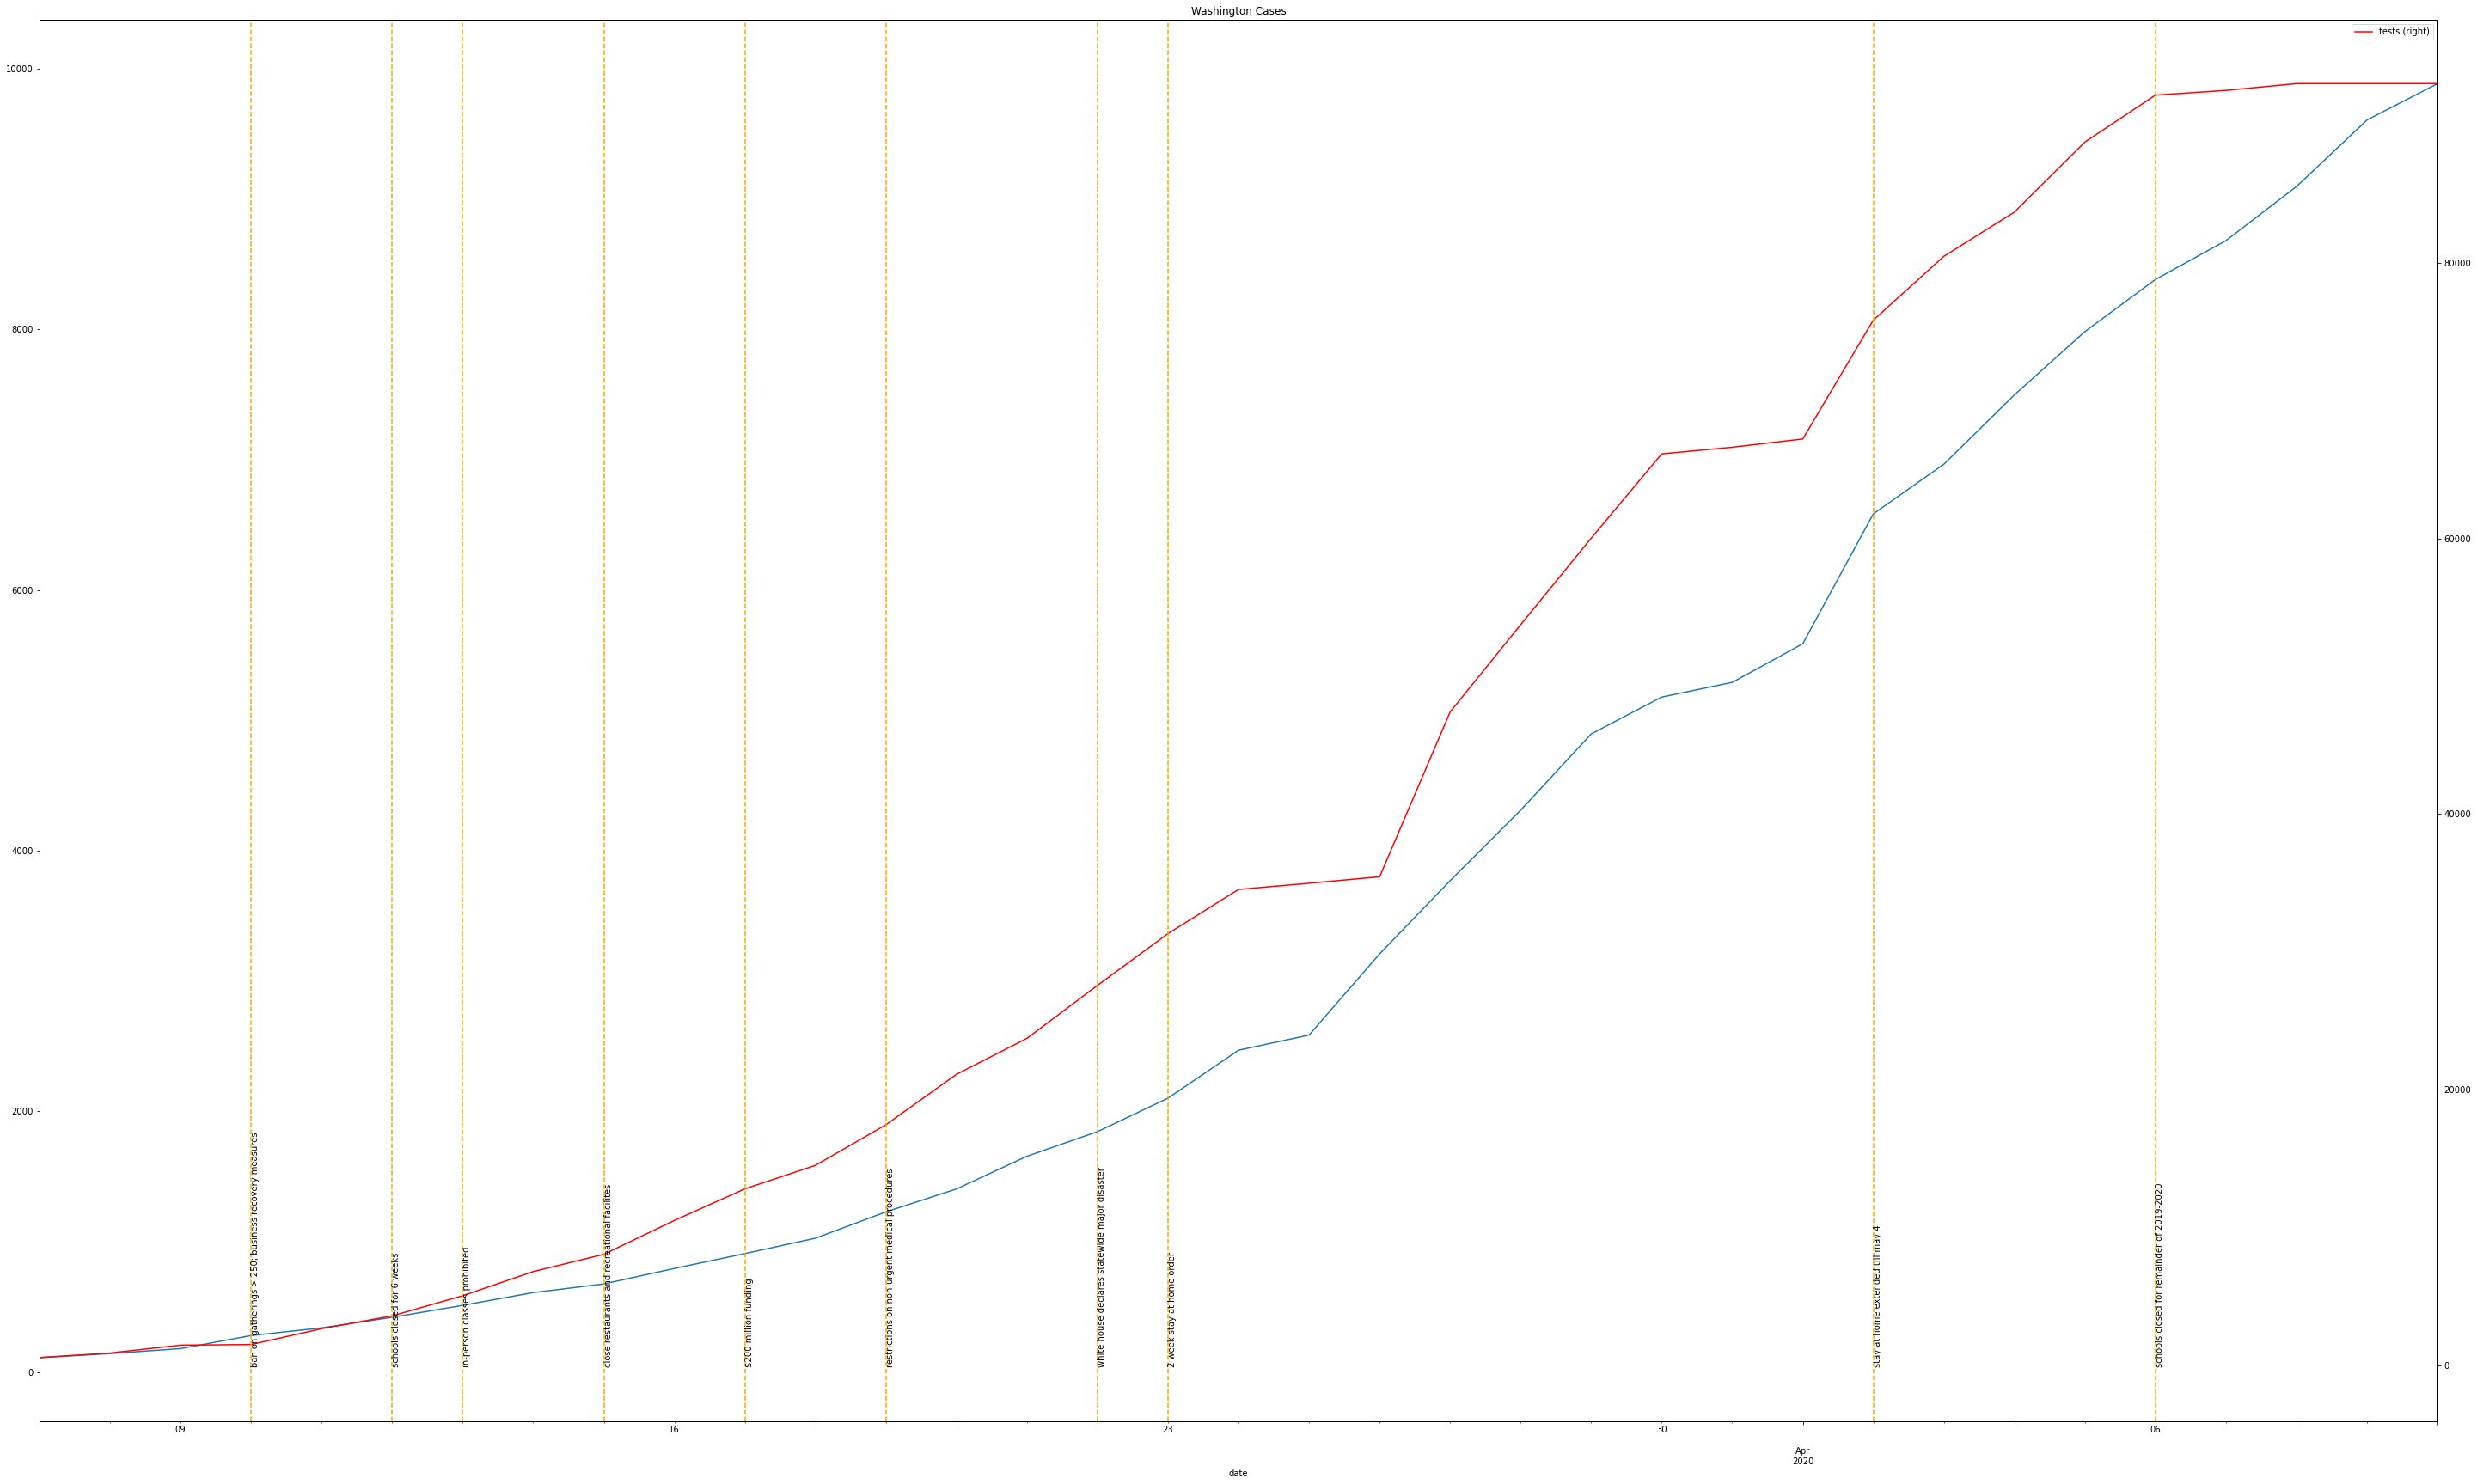

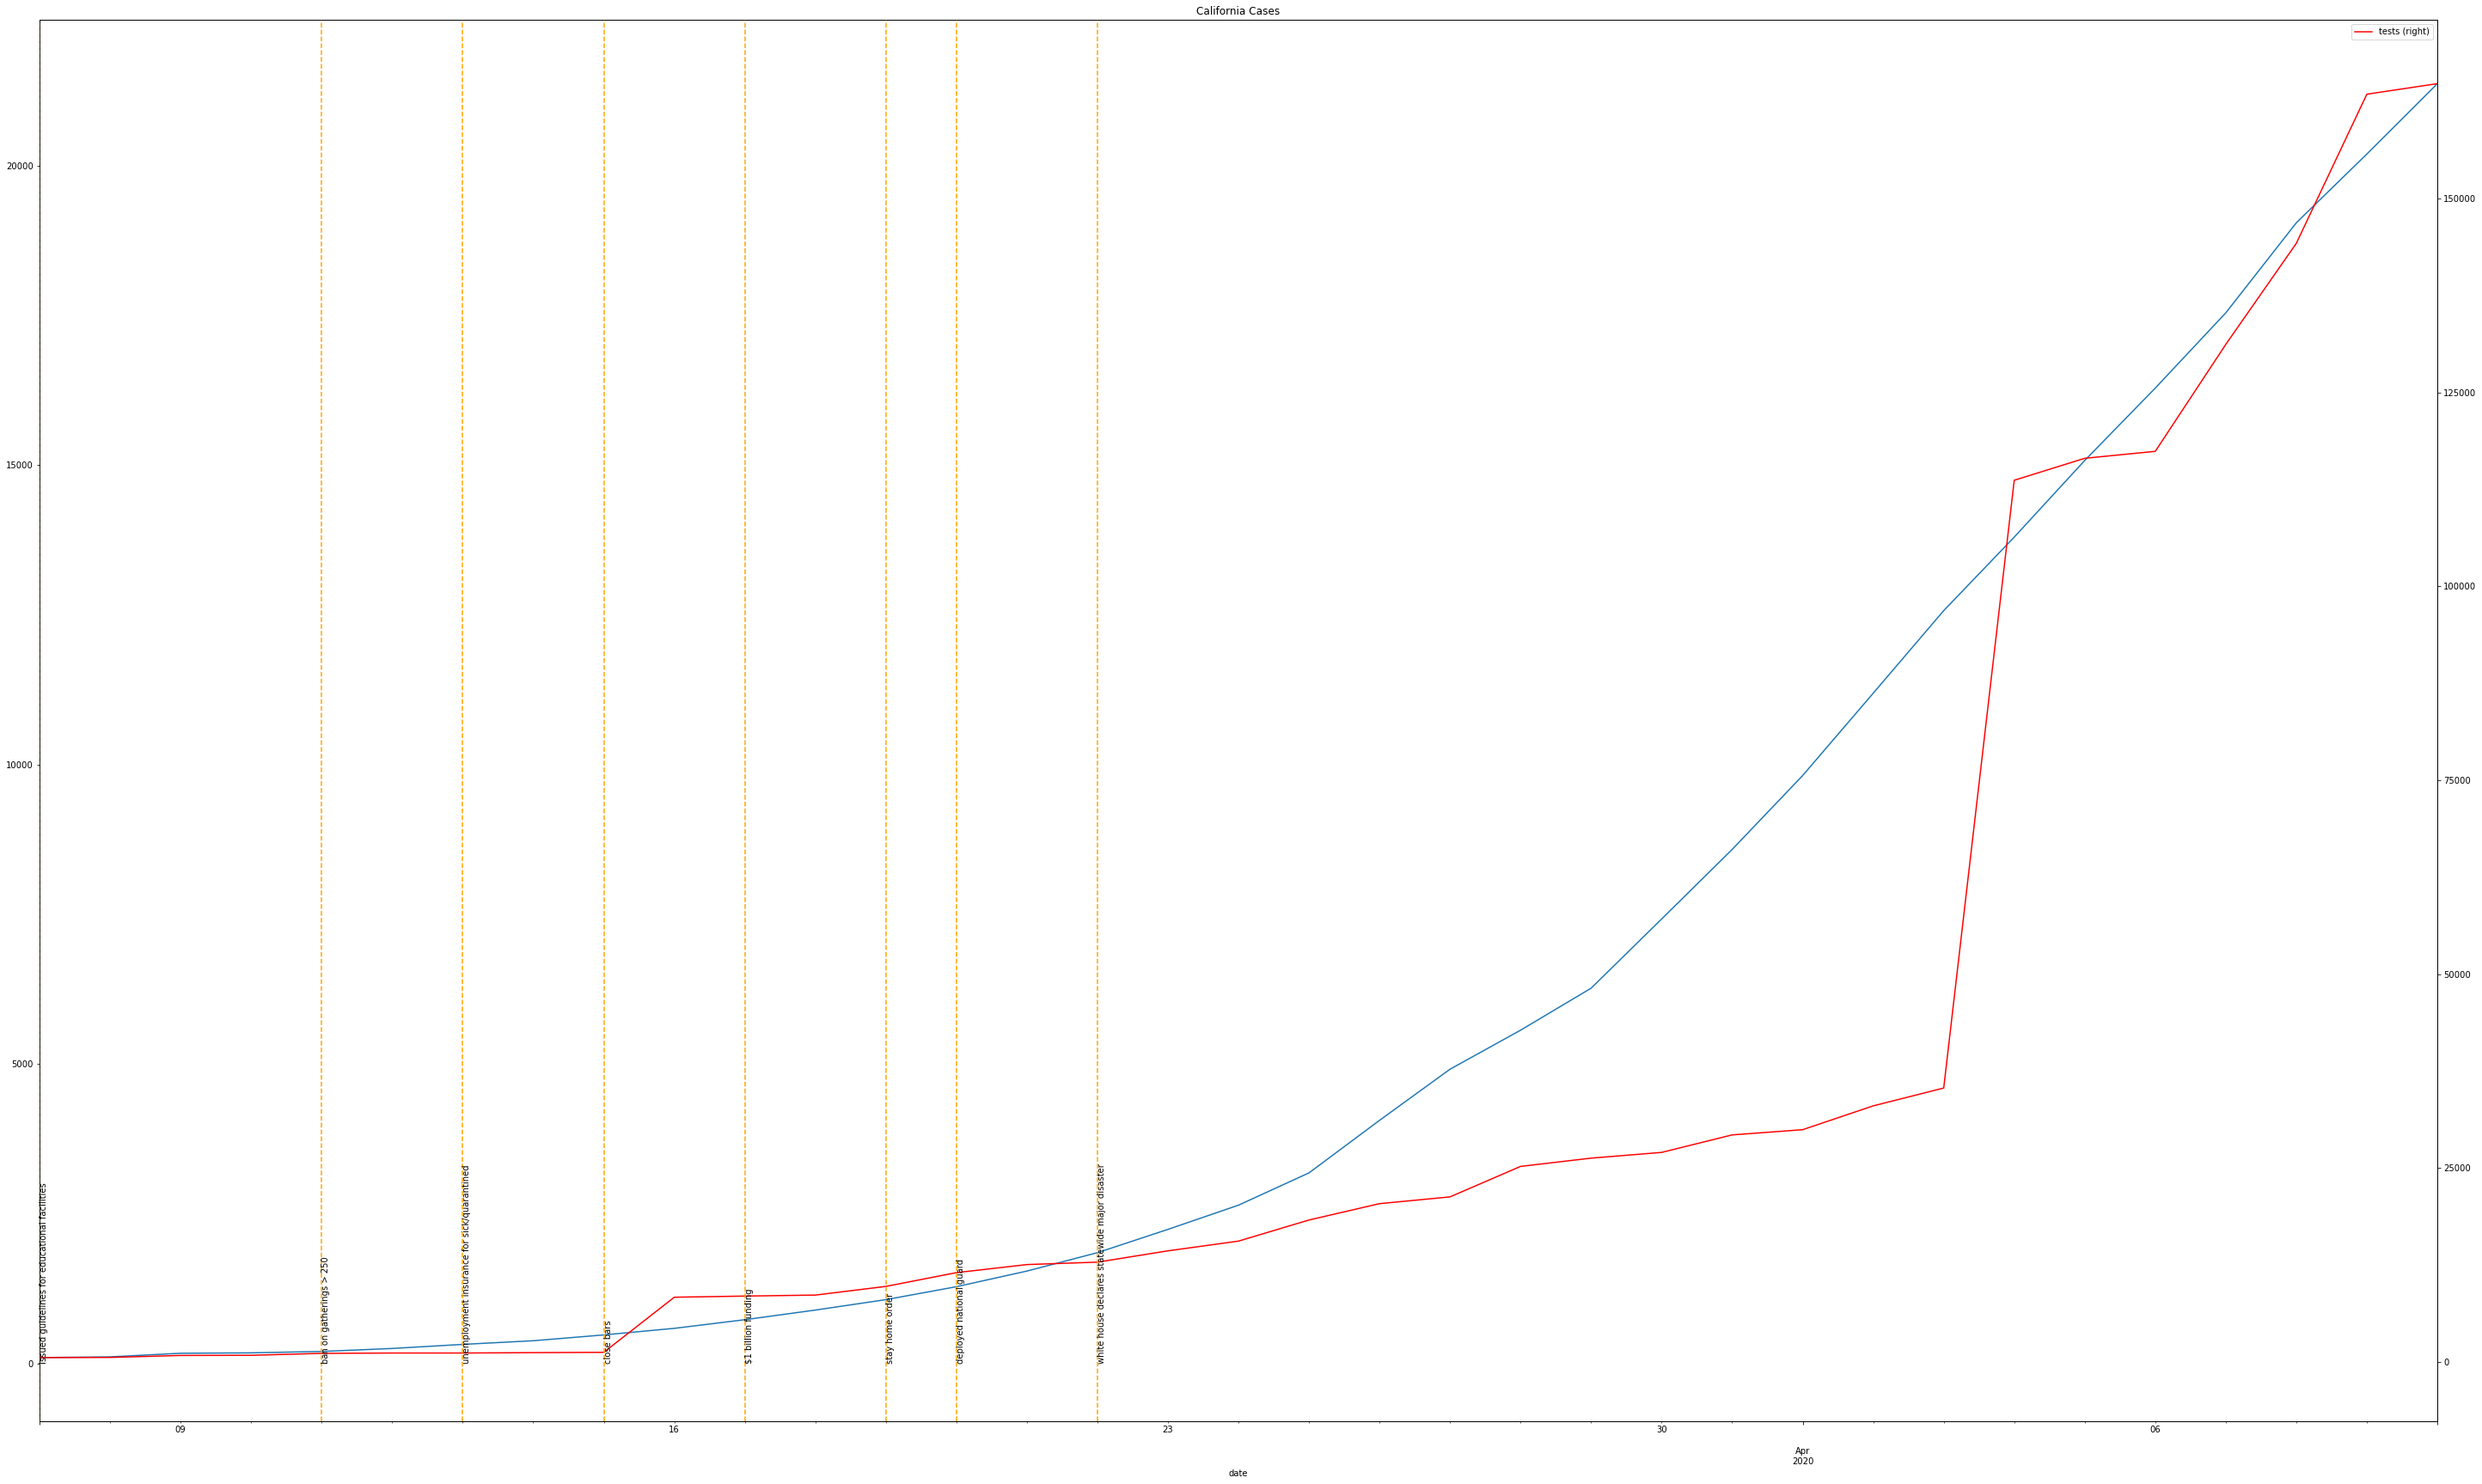

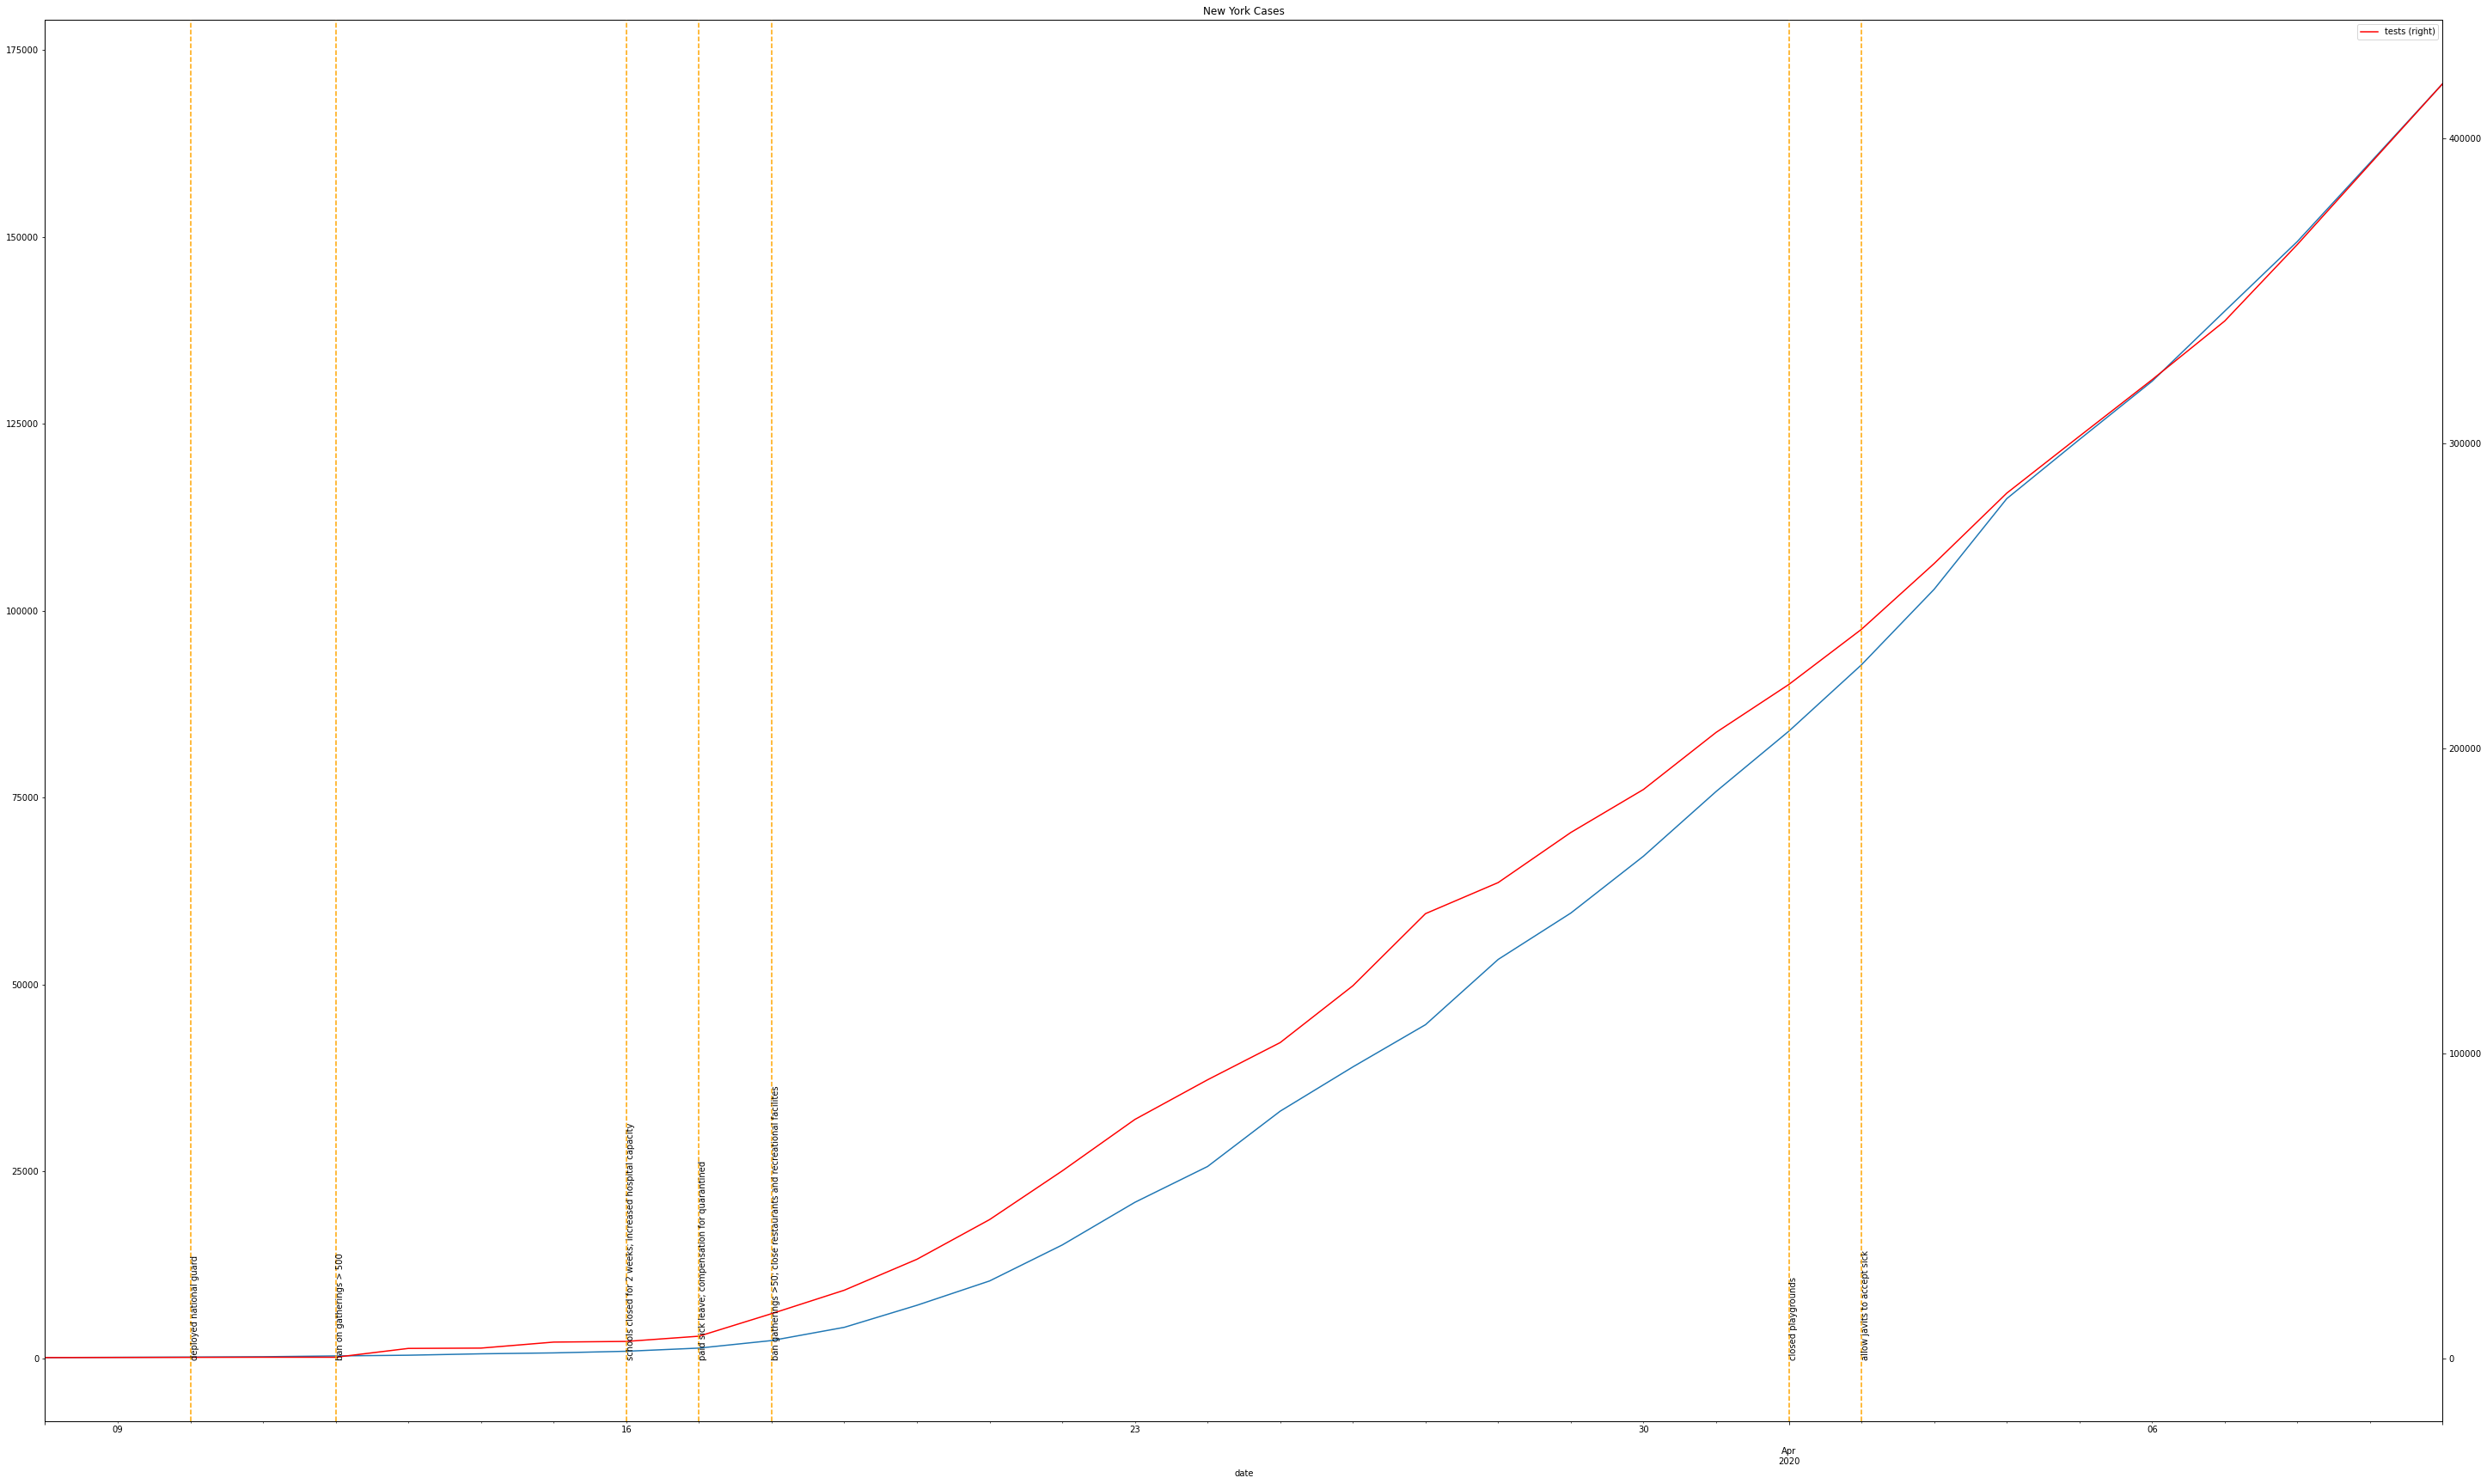

In [79]:
#plotting cases with added legslation lines for each state
for df in [washington, california, newyork]:
    fig, ax = plt.subplots(figsize=(50,30))
    df = df.query('cases >= 100')
    df.plot(y="cases", x="date", legend=False, ax = ax, title=df.iloc[0,1] + " Cases", kind="line")
    ax2 = ax.twinx()
    df.plot(y='tests', x='date', legend=True, ax=ax2, kind="line", color="red", secondary_y=True)
    df_actions = df.loc[~df['actions'].isnull()]

    for date, action in zip(df_actions['date'].to_numpy(), df_actions['actions'].to_numpy()):
        plt.axvline(date, linestyle='--', color='orange')
        plt.text(date, 4, action, rotation=90)
plt.show();

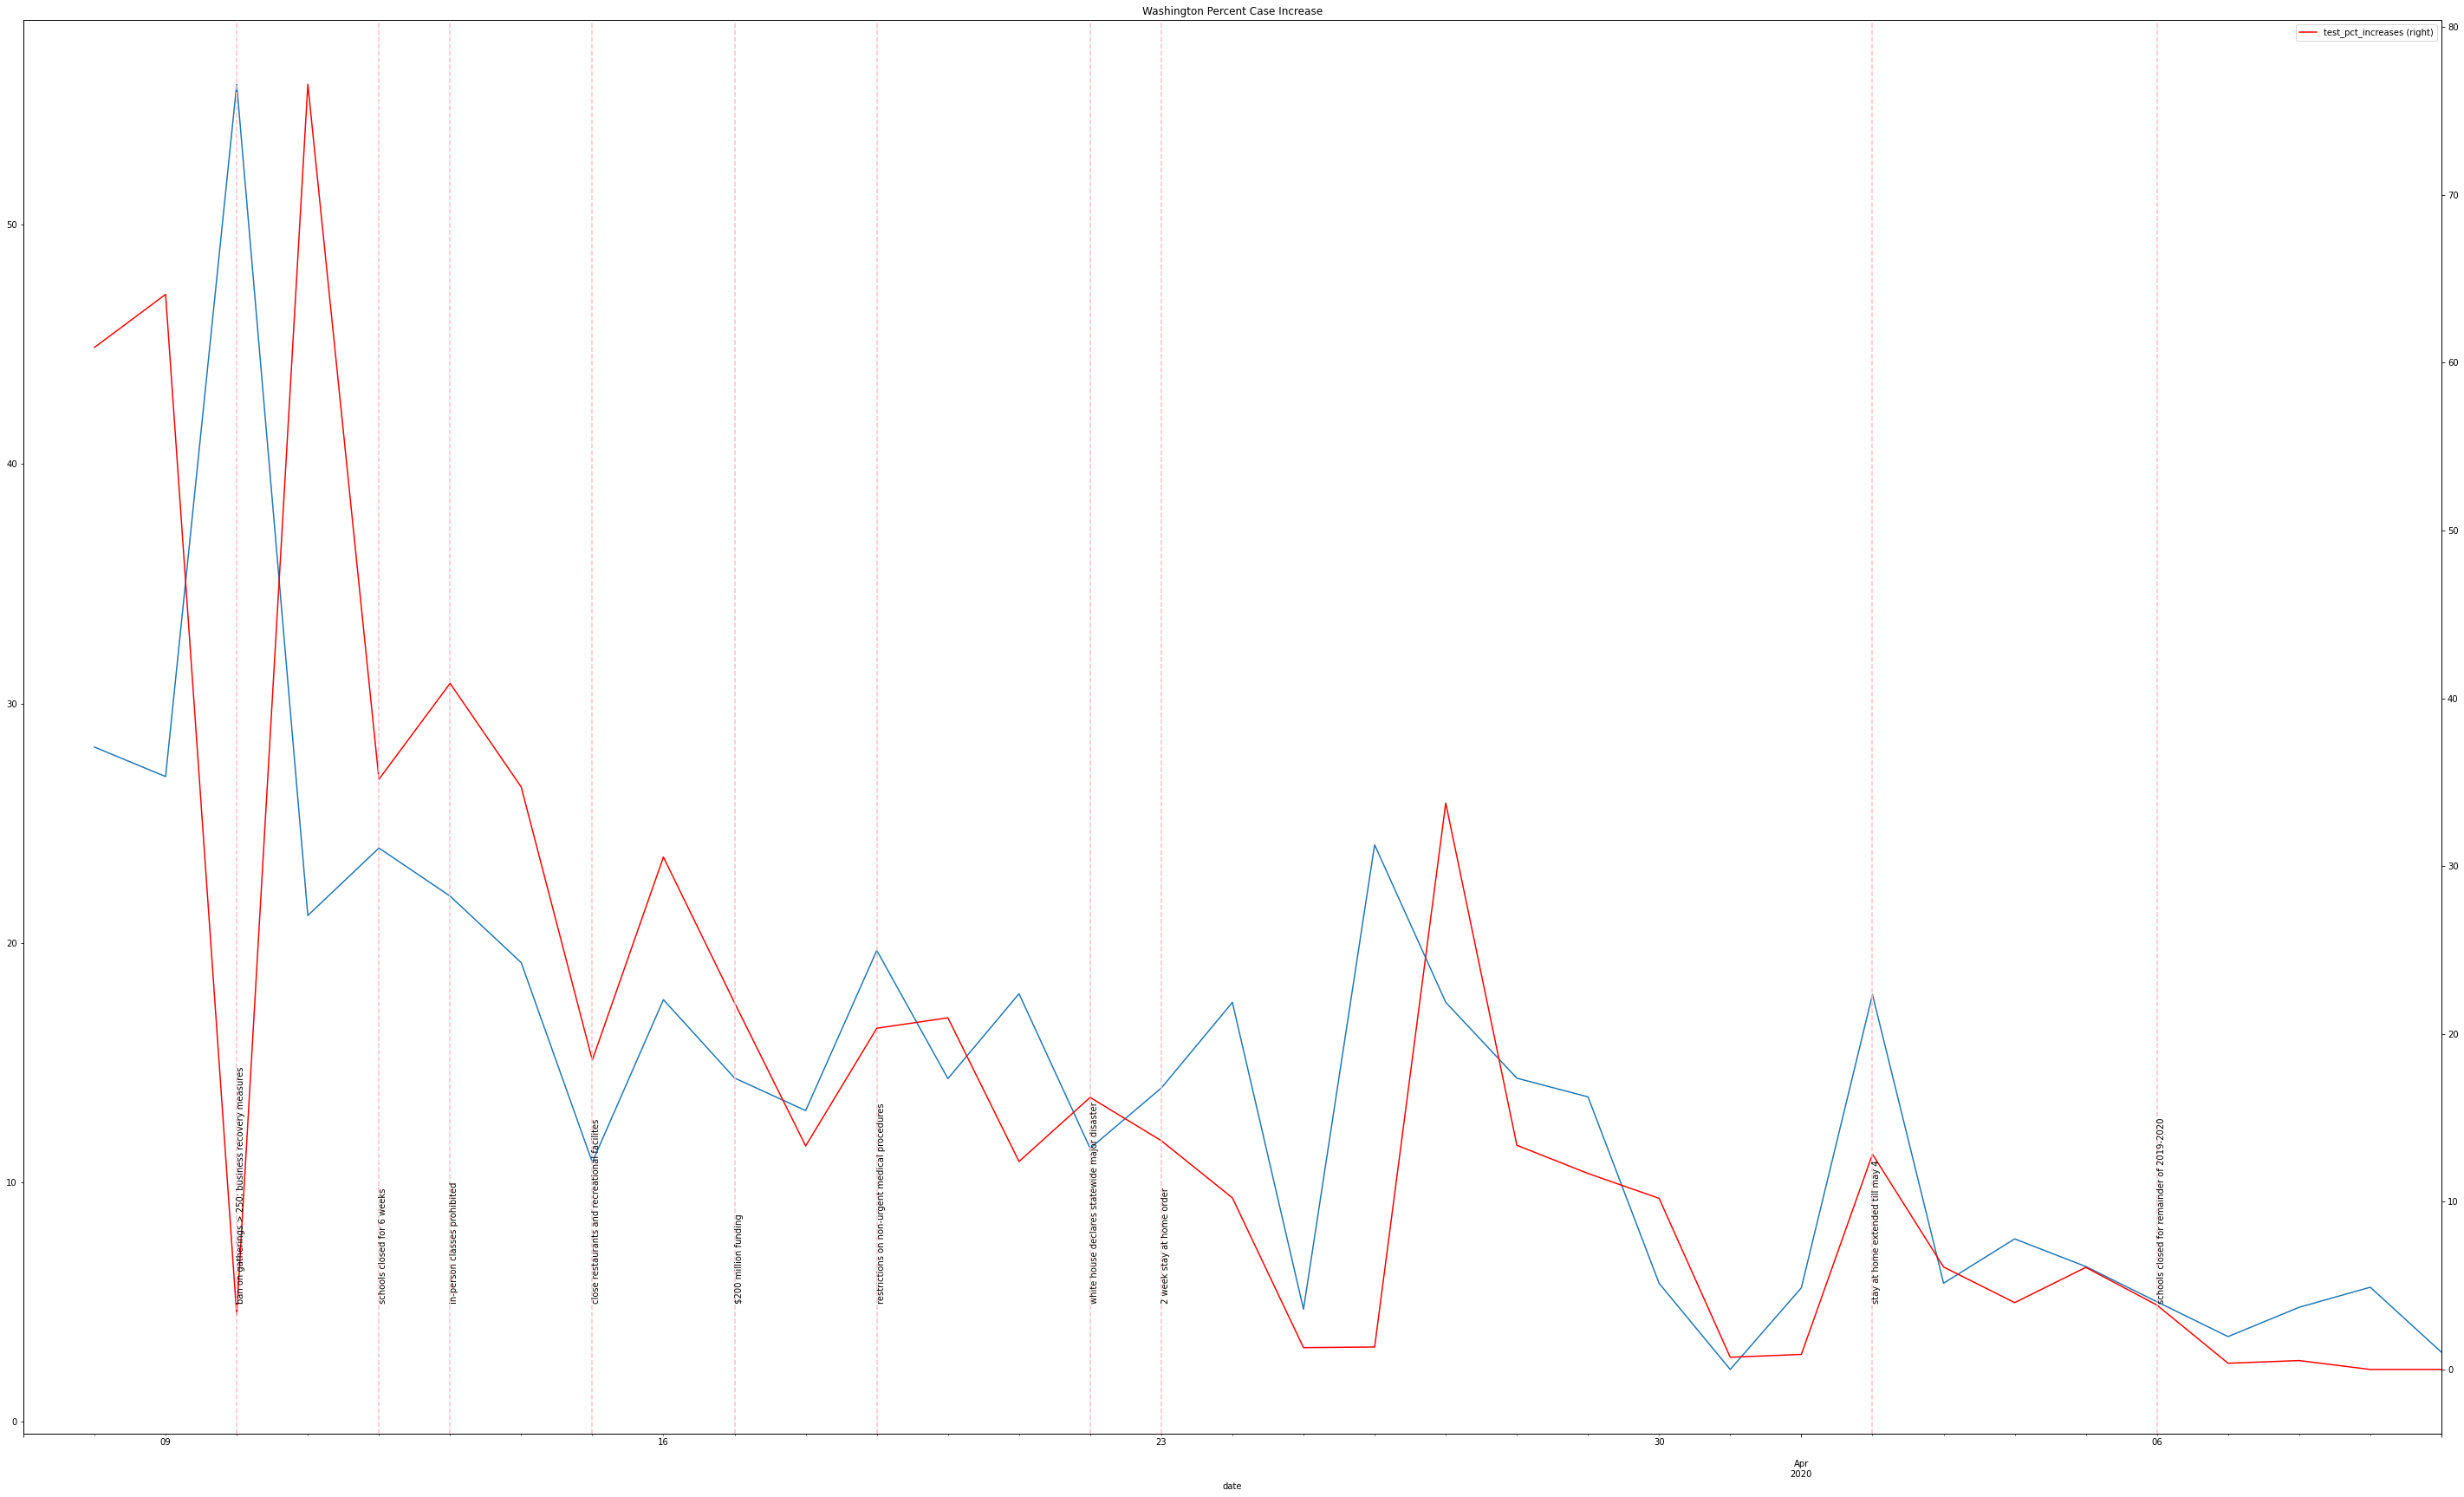

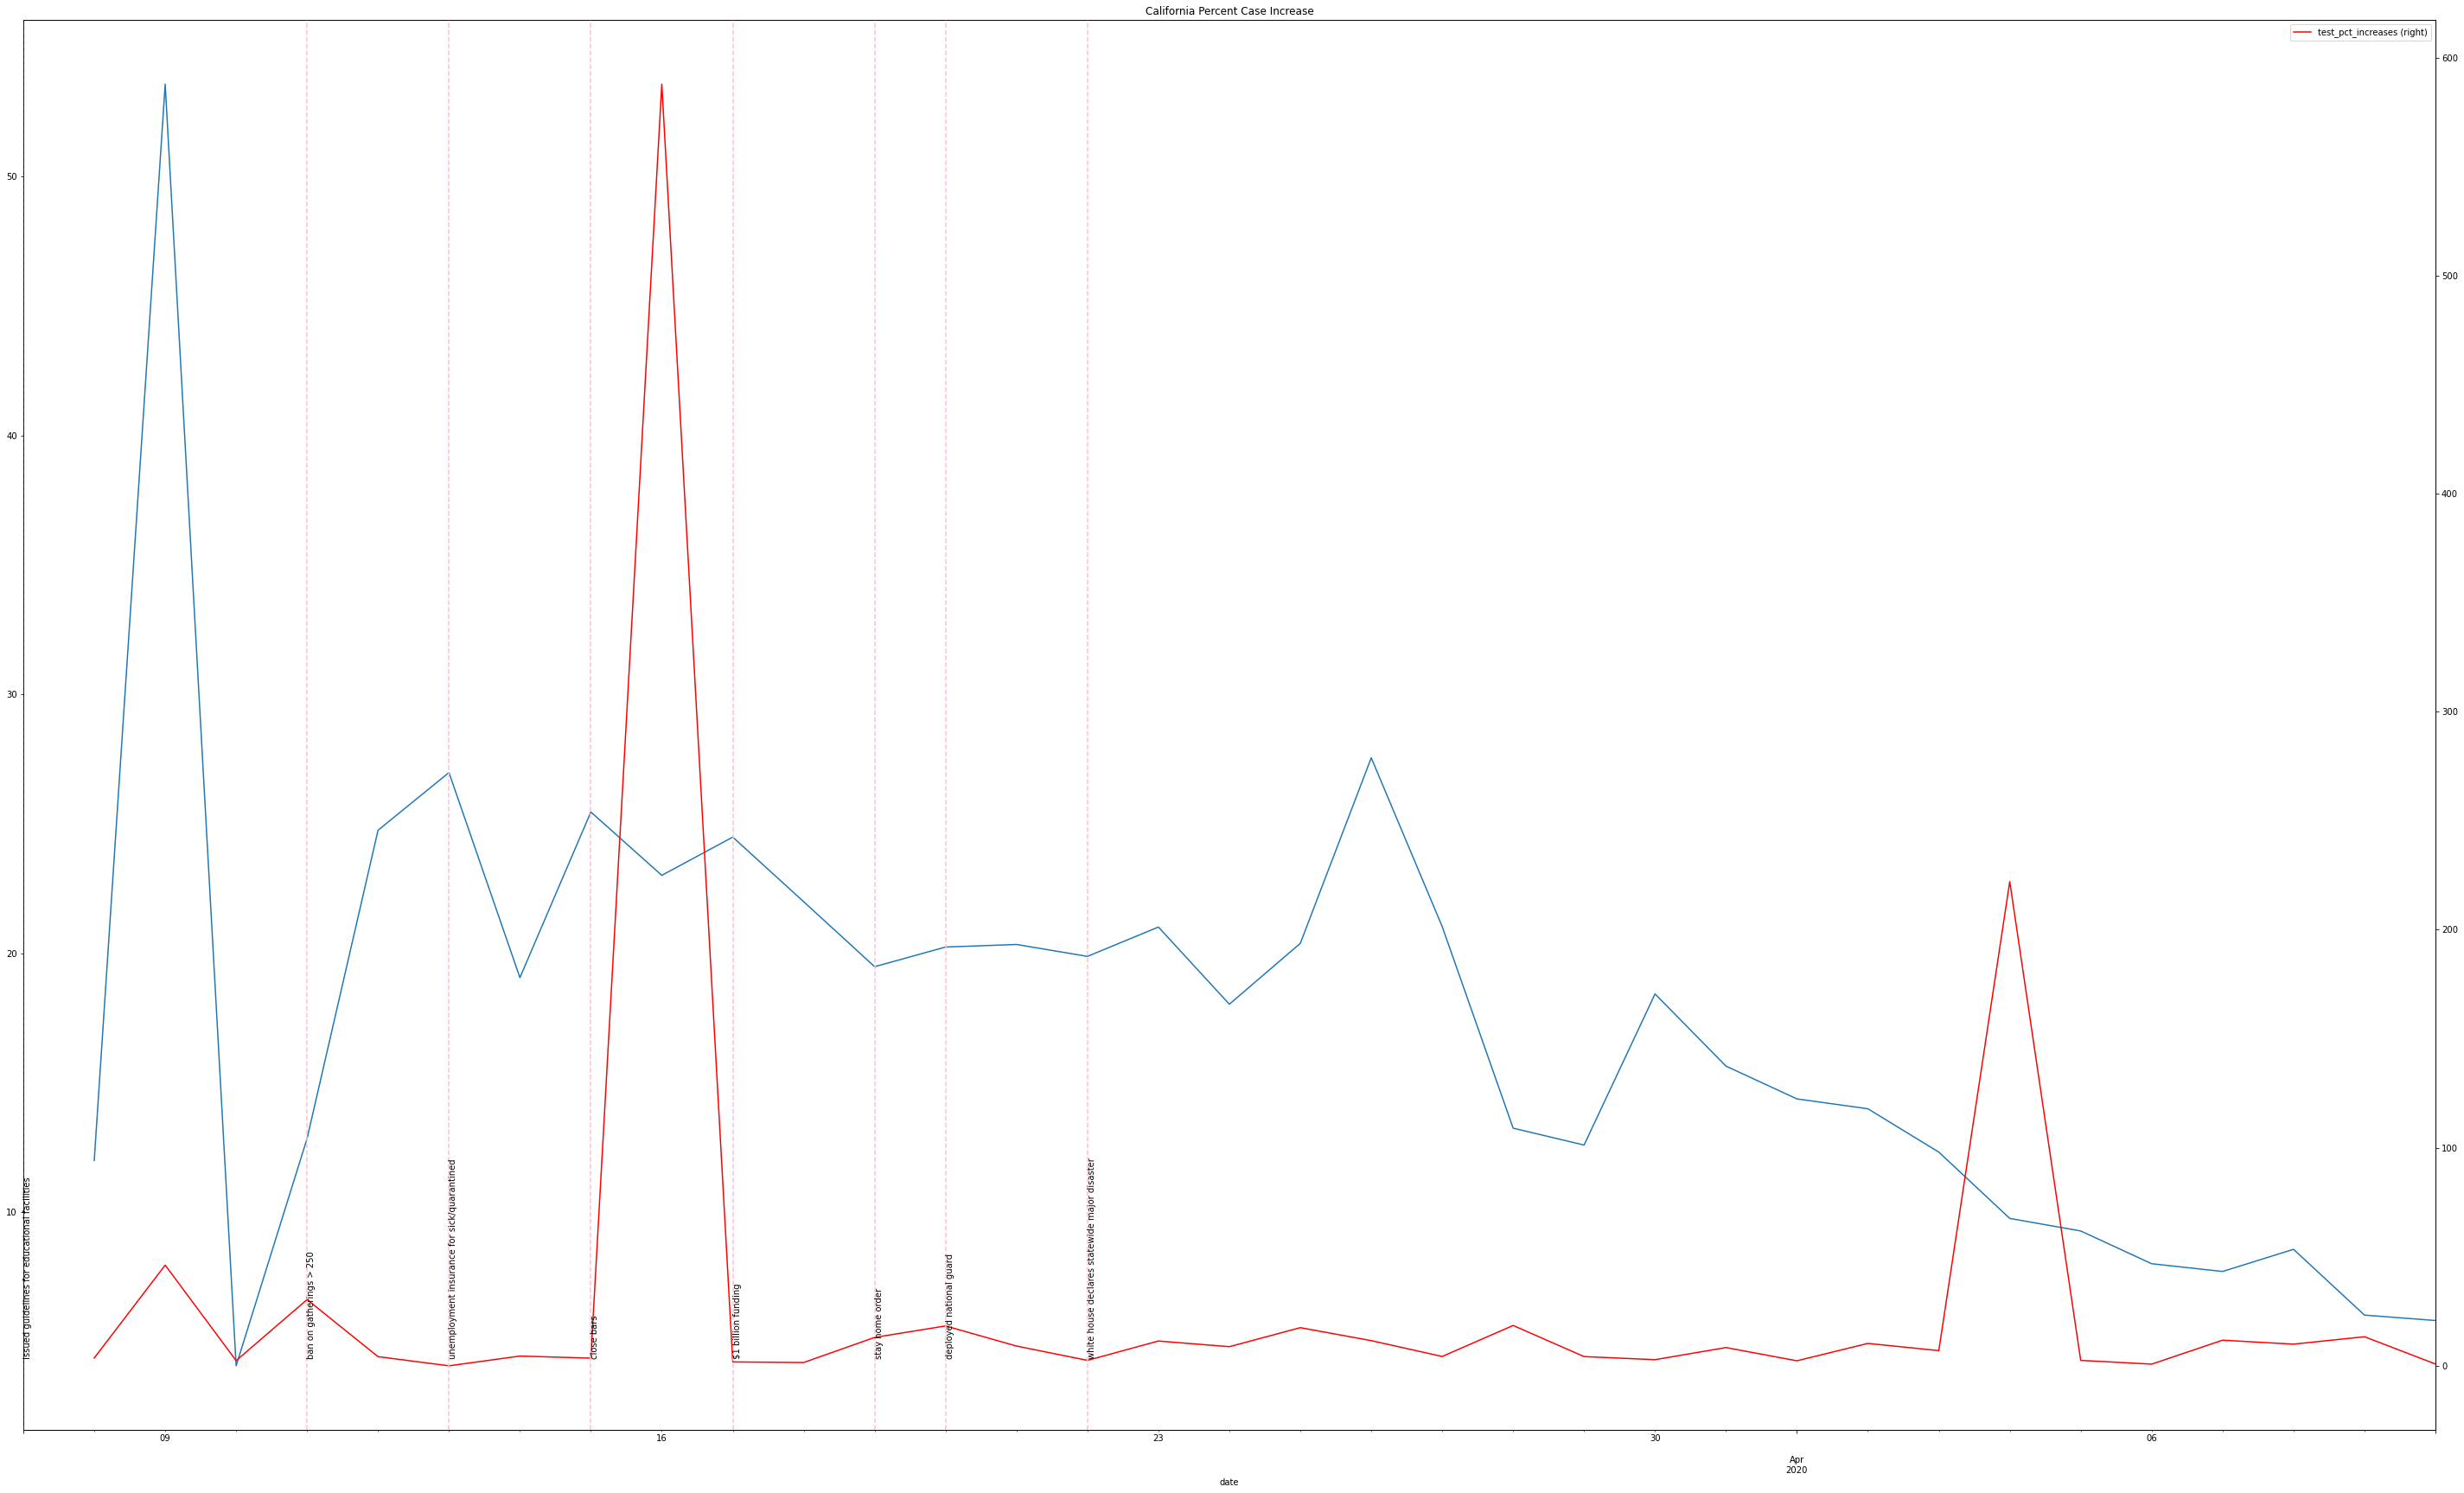

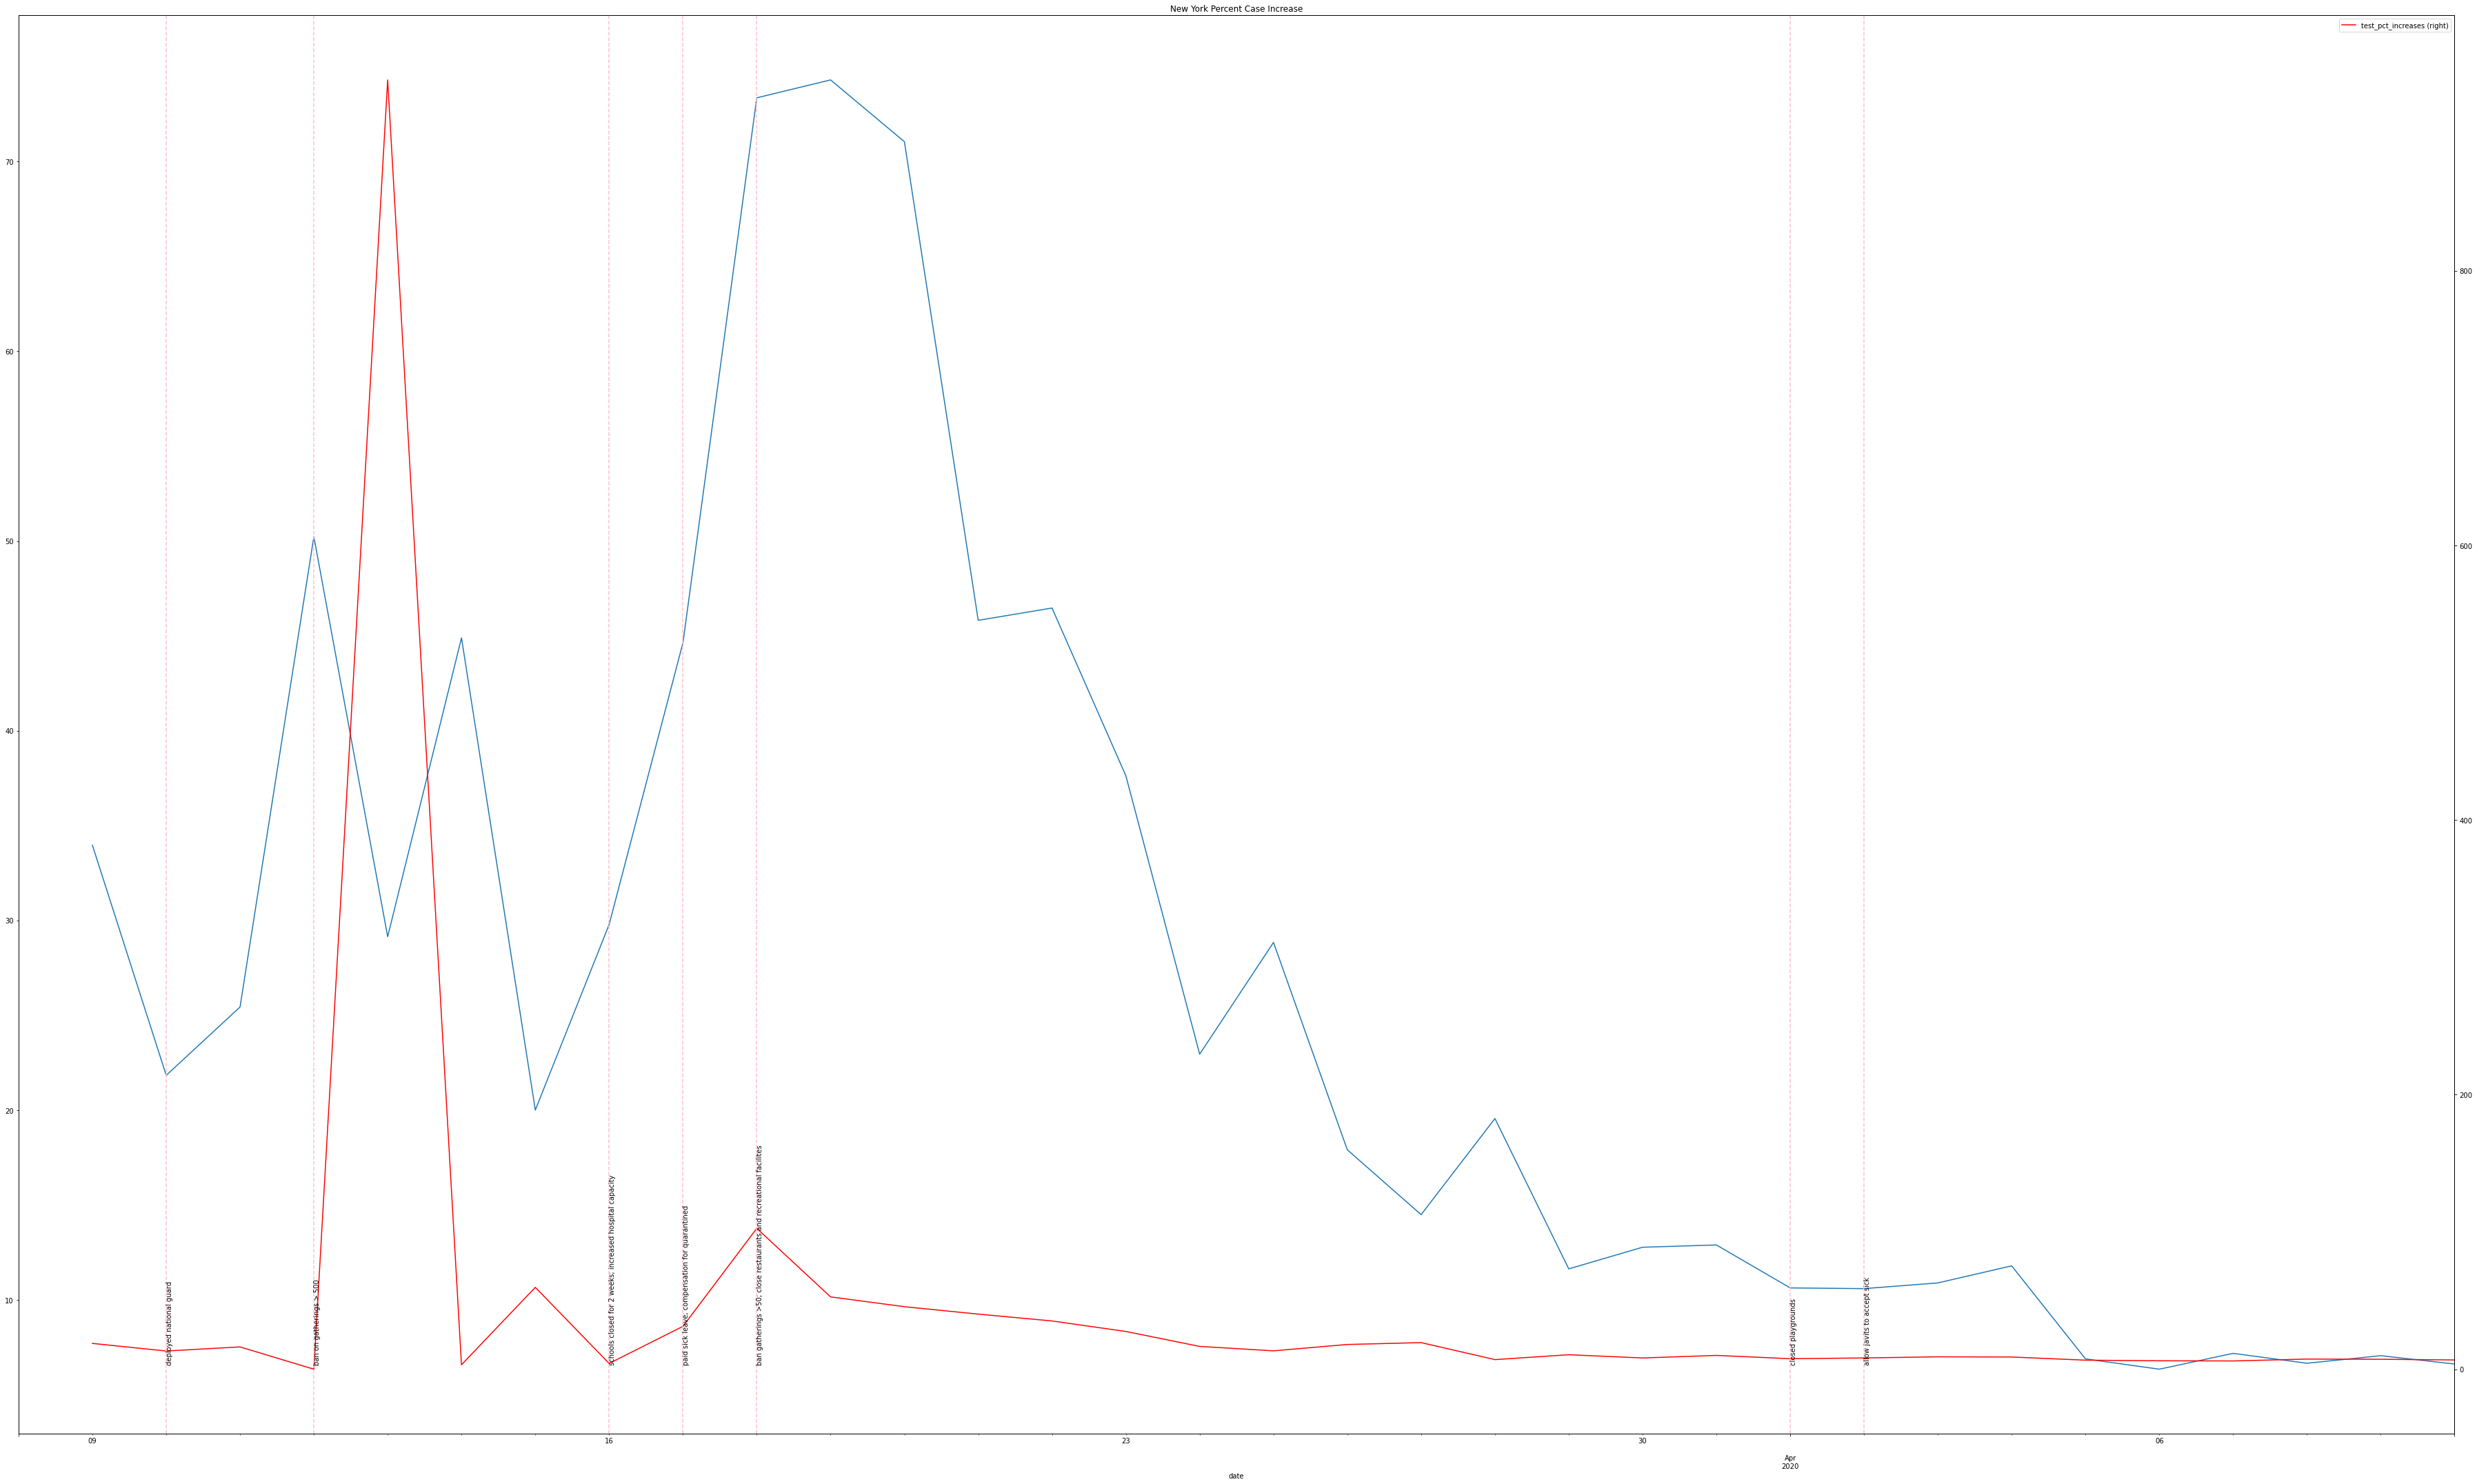

In [81]:

#plotting cases with added legslation lines for each state
for df in [washington, california, newyork]:
    fig, ax = plt.subplots(figsize=(50,30))
    df = df.query('cases >= 100')
    df['case_pct_increase'] = df.cases.pct_change().values * 100
    df.plot(x="date", y="case_pct_increase", legend=False, ax=ax, title=df.iloc[0,1] + " Percent Case Increase", kind='line')
    ax2 = ax.twinx()
    df['test_pct_increases'] = df.tests.pct_change().values * 100
    df.plot(y='test_pct_increases', x='date', legend=True, ax=ax2, kind="line", color="red", secondary_y=True)
    df_actions = df.loc[~df['actions'].isnull()]

    for date, action in zip(df_actions['date'].to_numpy(), df_actions['actions'].to_numpy()):
        plt.axvline(date, linestyle='--', color='pink')
        plt.text(date, 4, action, rotation=90)
plt.tight_layout();

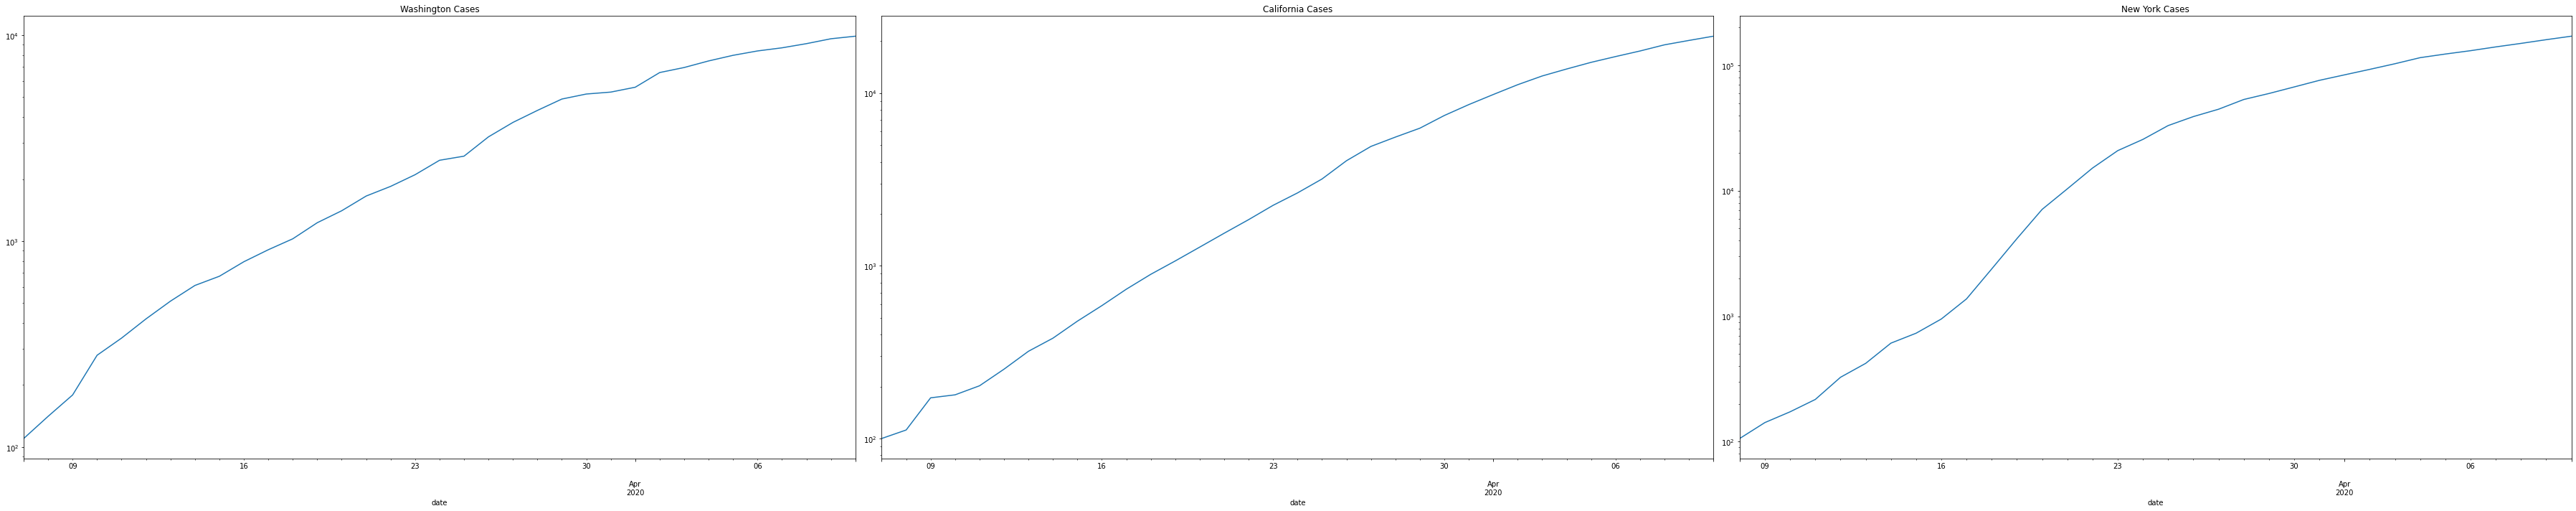

In [83]:
fig, ax = plt.subplots(1,3, figsize=(50,10))
current = 0
#line graphs for cases over time for each state (starting from the day that the state had >= 100 cases) on a logarithmic scale for enhanced clarity
for df in [washington, california, newyork]:
    df = df.query('cases >= 100')
    df.plot(x="date", y="cases", legend=False, ax=ax[current], title=df.iloc[0,1] + " Logarithmic Cases", logy=True)
    current += 1
plt.tight_layout();

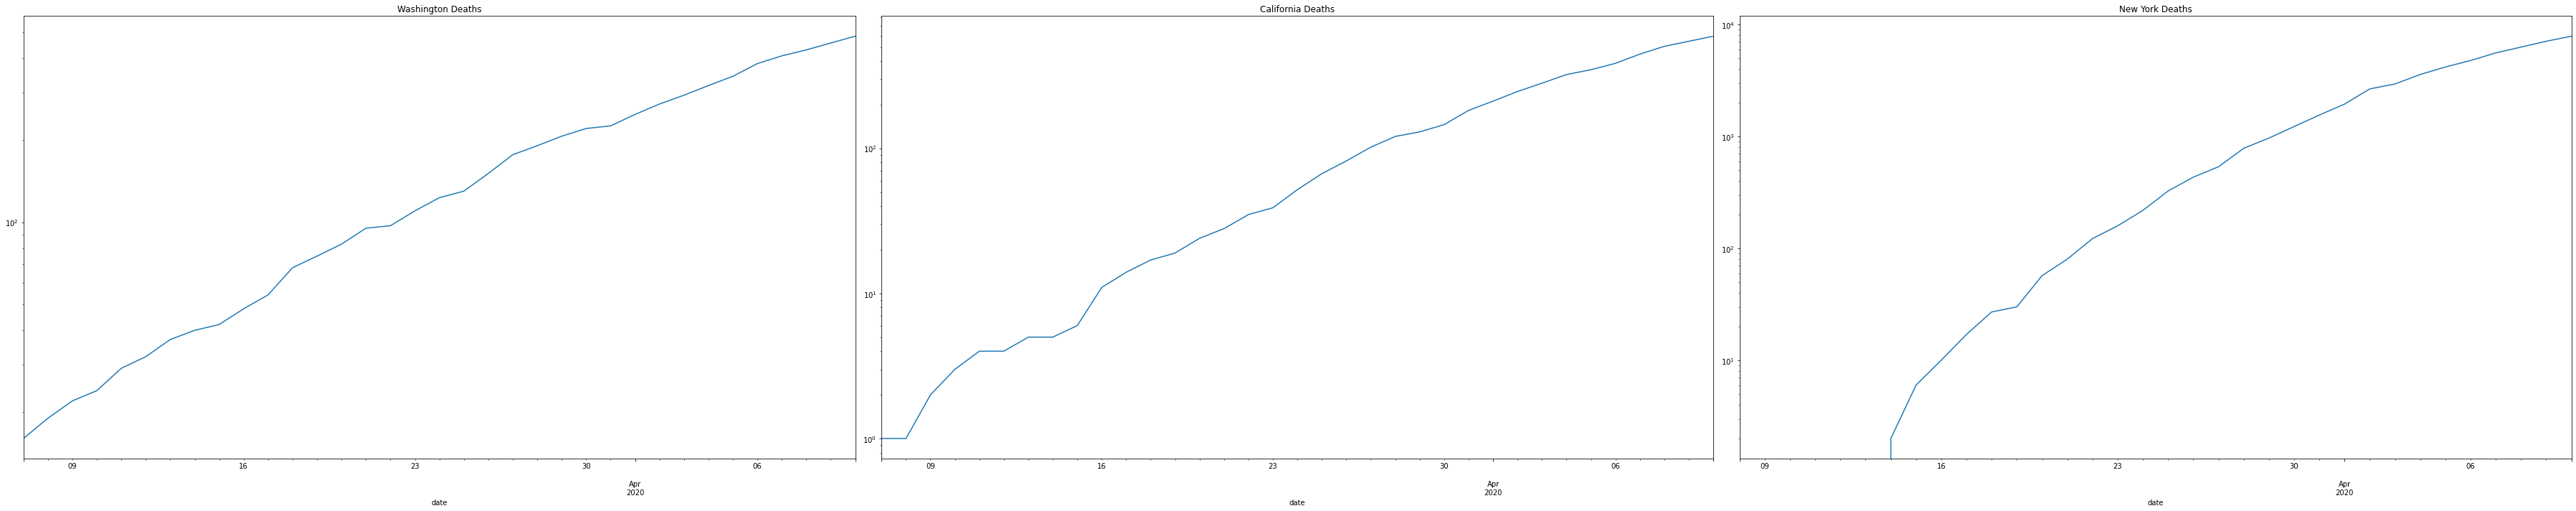

In [88]:
fig, ax = plt.subplots(1,3, figsize=(50,10))
current = 0
#line graphs for deaths over time for each state (starting from the day that the state had >= 100 cases) on a logarithmic scale for enhanced clarity
for df in [washington, california, newyork]:
    df = df.query('cases >= 100')
    df.plot(x="date", y="deaths", legend=False, ax=ax[current], title=df.iloc[0,1] + " Deaths", logy=True)
    current += 1
plt.tight_layout();